<a href="https://colab.research.google.com/github/am-1t/Data_Analysis_with_Python/blob/main/analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the dataset from URL and adding the necessary headers.

In [91]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv")

Replace the column headers in the pandas dataframe with a python list containing name of headers.

In [92]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

**Evaluating for Missing Data:**
Replacing the missing values in the dataset coming as '?' with the NaN(not a number) and finding the number of missing value in each columns. Replacing the missing values by their mean and dropping the rows where price is missing.

In [93]:
df.replace('?', np.nan, inplace=True)

for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(f"'{column}' has {df[column].isnull().sum()} missing values")

'normalized-losses' has 40 missing values
'num-of-doors' has 2 missing values
'bore' has 4 missing values
'stroke' has 4 missing values
'horsepower' has 2 missing values
'peak-rpm' has 2 missing values
'price' has 4 missing values


In [94]:
avg_norm_loss = df['normalized-losses'].astype(np.float32).mean(axis=0)
df.replace({'normalized-losses': np.nan}, avg_norm_loss, inplace=True)

In [95]:
avg_bore = df['bore'].astype(np.float32).mean(axis=0)
df.replace({'bore': np.nan}, avg_bore, inplace=True)

In [96]:
avg_stroke = df['stroke'].astype(np.float32).mean(axis=0)
df.replace({'stroke': np.nan}, avg_stroke, inplace=True)

In [97]:
avg_hp = df['horsepower'].astype(np.float32).mean(axis=0)
df.replace({'horsepower': np.nan}, avg_hp, inplace=True)

In [98]:
avg_rpm = df['peak-rpm'].astype(np.float32).mean(axis=0)
df.replace({'peak-rpm': np.nan}, avg_rpm, inplace=True)

In [99]:
df.replace({'num-of-doors': np.nan}, 'four', inplace=True)

In [100]:
df.dropna(subset=['price'], axis=0, inplace=True)

**Correct Data Format:** Convert data types to proper format

In [101]:
 df[['bore', 'stroke', 'price', 'peak-rpm', 'normalized-losses']] = df[['bore', 'stroke', 'price', 'peak-rpm', 'normalized-losses']].astype(np.float32)

**Data Standardisation:** Standardization is the process of transforming data into a common format, allowing for meaningful comparisons.
Transform mpg to L/100km

In [102]:
df['city/L-100km'] = df['city-mpg']/235

Transform the highway-mpg to highway-L/100km

In [103]:
df['highway-mpg'] = df['highway-mpg']/235
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)

**Data Normalization:** Transform values of several variable into similar range.
Normalized the 'width', 'height', and 'length' into the value range from 0 to 1.

In [104]:
df['length'] /= df['length'].max()
df['height'] /= df['height'].max()
df['width'] /= df['width'].max()

Plot the distribution of the horsepower to see the distribution of horsepower


Text(0.5, 1.0, 'Horsepower Distribution')

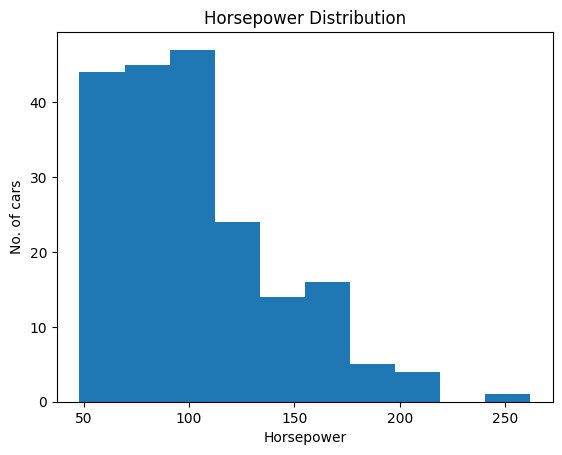

In [105]:
plt.hist(df['horsepower'].astype(np.float32))
plt.xlabel('Horsepower')
plt.ylabel('No. of cars')
plt.title('Horsepower Distribution')

**Binning:** Transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis. Convert the horsepower into three segments viz High, Medium, and little horsepower.

In [106]:
df['horsepower'] = df['horsepower'].astype(np.int32)
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins_names = ['Low', 'Medium', 'High']
df['horsepower-bin'] = pd.cut(df['horsepower'], bins, labels=bins_names, include_lowest=True )
df['horsepower-bin'].value_counts()

,count
horsepower-bin,
Low,152
Medium,43
High,5


Plot the distribution of the horsepower to see the distribution of horsepower after binning.


Text(0.5, 1.0, 'Horsepower Distribution')

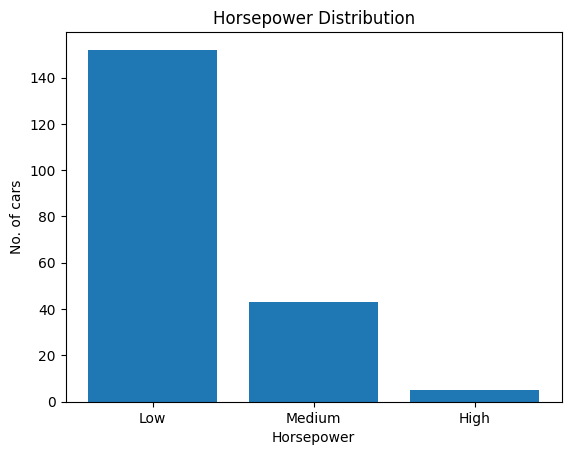

In [107]:
plt.bar(bins_names, df['horsepower-bin'].value_counts())
plt.xlabel('Horsepower')
plt.ylabel('No. of cars')
plt.title('Horsepower Distribution')

**Indicator Variable:** An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

 We use indicator variables so you can use categorical variables for regression analysis as regression doesn't understand words, only numbers.

In [108]:
dummy1 = pd.get_dummies(df['fuel-type'])
dummy1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
df = pd.concat([df, dummy1], axis=1)
df.drop('fuel-type', axis=1, inplace=True)

In [109]:
dummy2 = pd.get_dummies(df['aspiration'])
dummy2.rename(columns={'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [110]:
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city/L-100km,horsepower-bin,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,0.114894,16500.0,0.089362,Low,False,True,True,False
1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,0.110638,16500.0,0.080851,Medium,False,True,True,False
2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,0.127660,13950.0,0.102128,Low,False,True,True,False
3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,0.093617,17450.0,0.076596,Low,False,True,True,False
4,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,0.106383,15250.0,0.080851,Low,False,True,True,False
5,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,0.106383,17710.0,0.080851,Low,False,True,True,False
6,1,122.0,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,0.106383,18920.0,0.080851,Low,False,True,True,False
7,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,17,0.085106,23875.0,0.072340,Medium,False,True,False,True
9,2,192.0,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,0.123404,16430.0,0.097872,Low,False,True,True,False
10,0,192.0,bmw,four,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,0.123404,16925.0,0.097872,Low,False,True,True,False


In [111]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city/L-100km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.259816,10.170100,103.365000,5118.259766,25.200000,0.130660,13205.690430,0.107234
std,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,4.014163,37.455525,479.240662,6.432487,0.029052,7966.983398,0.027372
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,0.068085,5118.000000,0.055319
25%,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,0.106383,7775.000000,0.080851
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995117,24.000000,0.127660,10270.000000,0.102128
75%,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,0.144681,16500.750000,0.127660
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,0.229787,45400.000000,0.208511


Correlation between 'float64' and 'int64' using the method corr

In [112]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-L/100km,city/L-100km
symboling,1.000000,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.181073,-0.030158,0.041248,-0.030158
wheel-base,-0.529145,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.249689,-0.480029,-0.552211,-0.480029
length,-0.364511,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.159203,-0.667658,-0.700186,-0.667658
width,-0.237262,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.189008,-0.638155,-0.684700,-0.638155
height,-0.542261,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.259526,-0.057087,-0.111568,-0.057087
curb-weight,-0.234743,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.156444,-0.750390,-0.795515,-0.750390
engine-size,-0.112069,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.029005,-0.651002,-0.679877,-0.651002
compression-ratio,-0.181073,0.249689,0.159203,0.189008,0.259526,0.156444,0.029005,1.000000,0.330897,0.267929,0.330897
city-mpg,-0.030158,-0.480029,-0.667658,-0.638155,-0.057087,-0.750390,-0.651002,0.330897,1.000000,0.972024,1.000000
highway-L/100km,0.041248,-0.552211,-0.700186,-0.684700,-0.111568,-0.795515,-0.679877,0.267929,0.972024,1.000000,0.972024


Positive direct correlation between engine-size and price. Engine size is a good predictor of price as the regression plot is alomost a perfect diagonal line.

(0.0, 53304.756974699245)

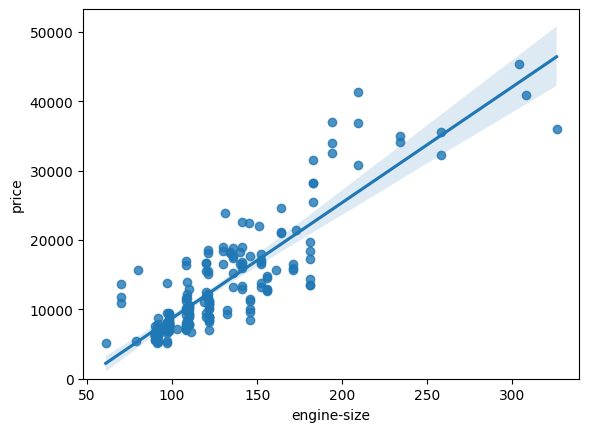

In [113]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0, )

We can see that the correlation between engine-size and price is very close to 1, depicting a positive correlation. The default method in corr() function is the Pearson correlation.

In [114]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


(0.0, 48163.6743670813)

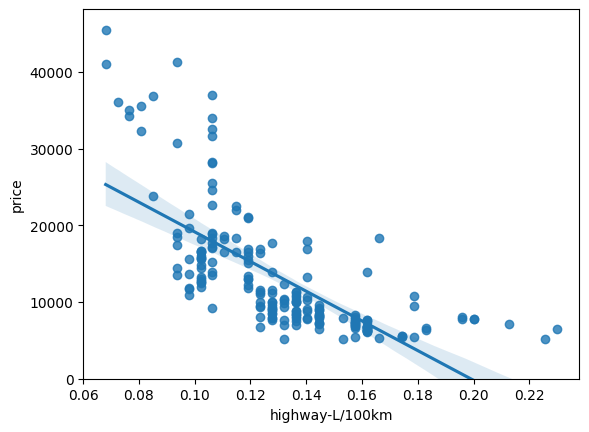

In [124]:
sns.regplot(x='highway-L/100km', y='price', data=df)
plt.ylim(0, )

In [125]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,-0.705115
price,-0.705115,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

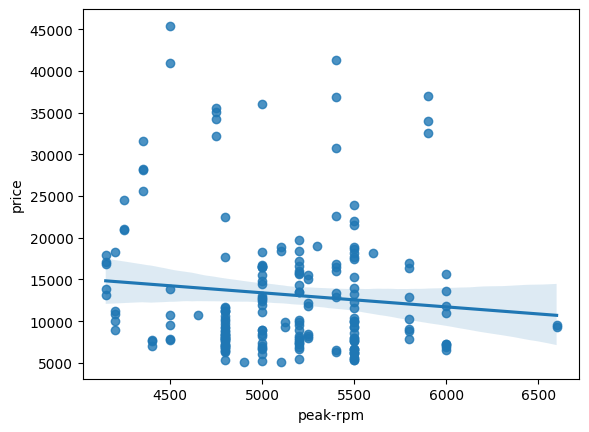

In [116]:
sns.regplot(x='peak-rpm', y='price', data=df)

In [117]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


(0.0, 47414.1)

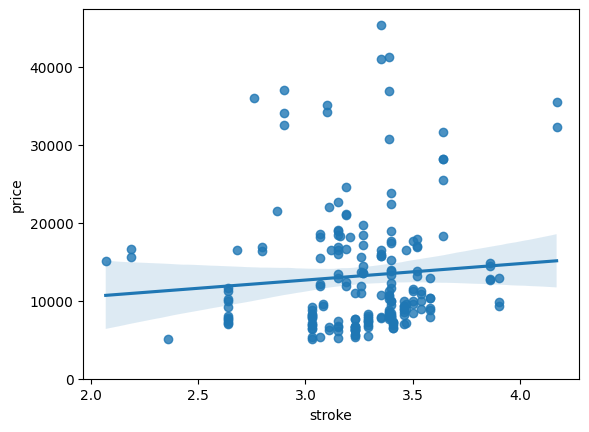

In [118]:
sns.regplot(x='stroke', y='price', data=df)
plt.ylim(0, )

In [119]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.083298
price,0.083298,1.000000


(0.0, 47414.1)

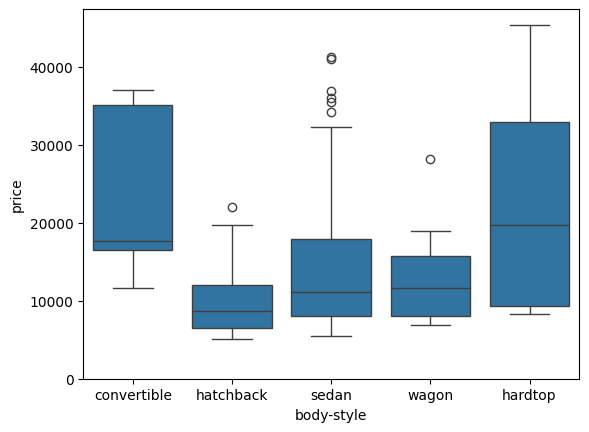

In [120]:
sns.boxplot(x='body-style', y='price', data=df)
plt.ylim(0, )

(0.0, 47414.1)

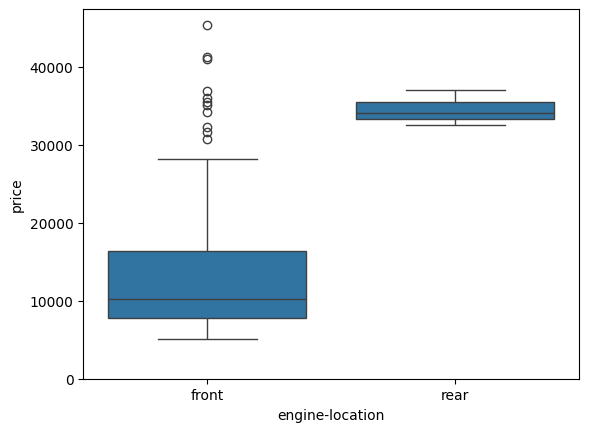

In [121]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.ylim(0, )

In [122]:
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,197,145,156,91
